In [20]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

In [21]:
# Data parameters for comparing rainfall betwen London and Seattle for the year 2022. 

# url = 'https://archive-api.open-meteo.com/v1/archive'
# lat_london = 51.5074
# long_london = -0.1278
# lat_seattle = 47.6062
# long_seattle = -122.3321
# start_date = '2021-12-01'
# end_date = '2022-11-30'
# hourly_precip = ['precipitation']
# timezone_london = 'Etc/GreenwichLondon'
# timezone_seattle = 'America/Los_Angeles'


In [22]:
# Seattle

url = 'https://archive-api.open-meteo.com/v1/archive'

lat_seattle = 47.6062
long_seattle = -122.3321
hourly_precip = ['precipitation']
start_date = '2022-01-01'
end_date = '2022-12-31'

params_seattle ={
    'latitude': lat_seattle,
    'longitude': long_seattle,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_precip),
    'timezone': 'America/Los_Angeles'
}

response = requests.get(url, params = params_seattle)

In [23]:
if response.status_code == 200:
    print('Data retrieved')
else:
    print(f'Data retrieval failed.  Status Code:  {response.status_code}')


Data retrieved


In [24]:
seattle_data = response.json()
hourly_seattle = seattle_data['hourly']

df_seattle = pd.DataFrame(hourly_seattle)
df_seattle.head()



,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [25]:
df_seattle['time'] = pd.to_datetime(df_seattle['time'])
df_seattle.set_index('time', inplace=True)
df_weekly_sea = df_seattle.resample('W').sum()

df_weekly_sea.isnull().sum()



precipitation    0
dtype: int64

In [26]:
df_weekly_sea.head()


,precipitation
time,
2022-01-02,31.3
2022-01-09,108.8
2022-01-16,45.5
2022-01-23,15.7
2022-01-30,6.1


In [27]:
df_weekly_sea.describe()

,precipitation
count,53.000000
mean,21.343396
std,23.928937
min,0.000000
25%,2.100000
50%,10.800000
75%,35.200000
max,108.800000


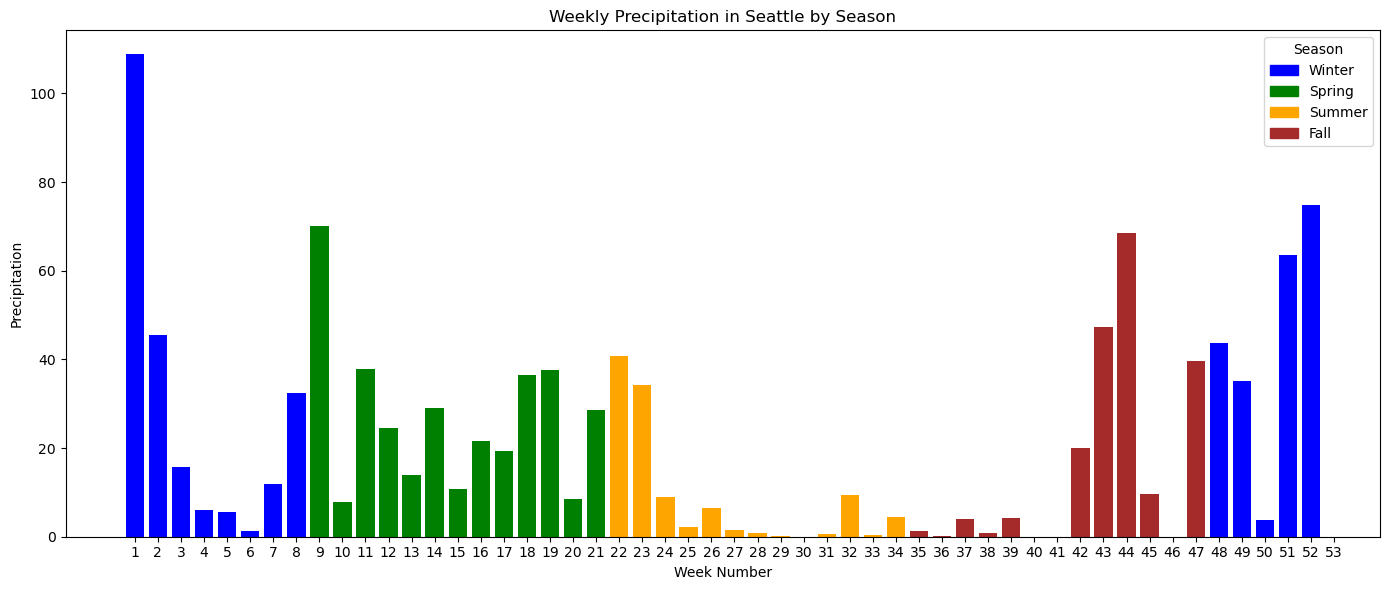

In [28]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_weekly_sea['season'] = df_weekly_sea.index.map(get_season)
df_weekly_sea['week_number'] = df_weekly_sea.index.isocalendar().week

season_colors = {
    'Winter': 'blue',
    'Spring': 'green',
    'Summer': 'orange',
    'Fall': 'brown'
}
bar_colors = df_weekly_sea['season'].map(season_colors)

plt.figure(figsize=(14, 6))
plt.bar(df_weekly_sea['week_number'], df_weekly_sea['precipitation'], color=bar_colors)

legend_patches = [Patch(color=color, label=season) for season, color in season_colors.items()]
plt.legend(handles=legend_patches, title='Season')

plt.title('Weekly Precipitation in Seattle by Season')
plt.xlabel('Week Number')
plt.ylabel('Precipitation')
plt.xticks(range(1, 54))  # ISO weeks go up to 53
plt.tight_layout()
plt.show()


In [29]:
#London

lat_london = 51.5074
long_london = -0.1278
hourly_precip_lon = ['precipitation']

params_london ={
    'latitude': lat_london,
    'longitude': long_london,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_precip_lon),
    'timezone': 'GMT+0'
}

response = requests.get(url, params = params_london)

In [30]:
if response.status_code == 200:
    print('Data retrieved')
else:
    print(f'Data retrieval failed.  Status Code:  {response.status_code}')

Data retrieved


In [31]:
london_data = response.json()
hourly_london = london_data['hourly']

df_london = pd.DataFrame(hourly_london)
df_london.head()


,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [32]:
df_london['time'] = pd.to_datetime(df_london['time'])
df_london.set_index('time', inplace=True)
df_weekly_lon = df_london.resample('W').sum()

df_weekly_lon.isnull().sum()



precipitation    0
dtype: int64

In [33]:
df_weekly_lon.head()

,precipitation
time,
2022-01-02,2.2
2022-01-09,12.9
2022-01-16,3.1
2022-01-23,0.0
2022-01-30,0.4


In [34]:
df_weekly_lon.describe()

,precipitation
count,53.000000
mean,12.511321
std,13.596134
min,0.000000
25%,3.100000
50%,7.700000
75%,17.500000
max,67.800000


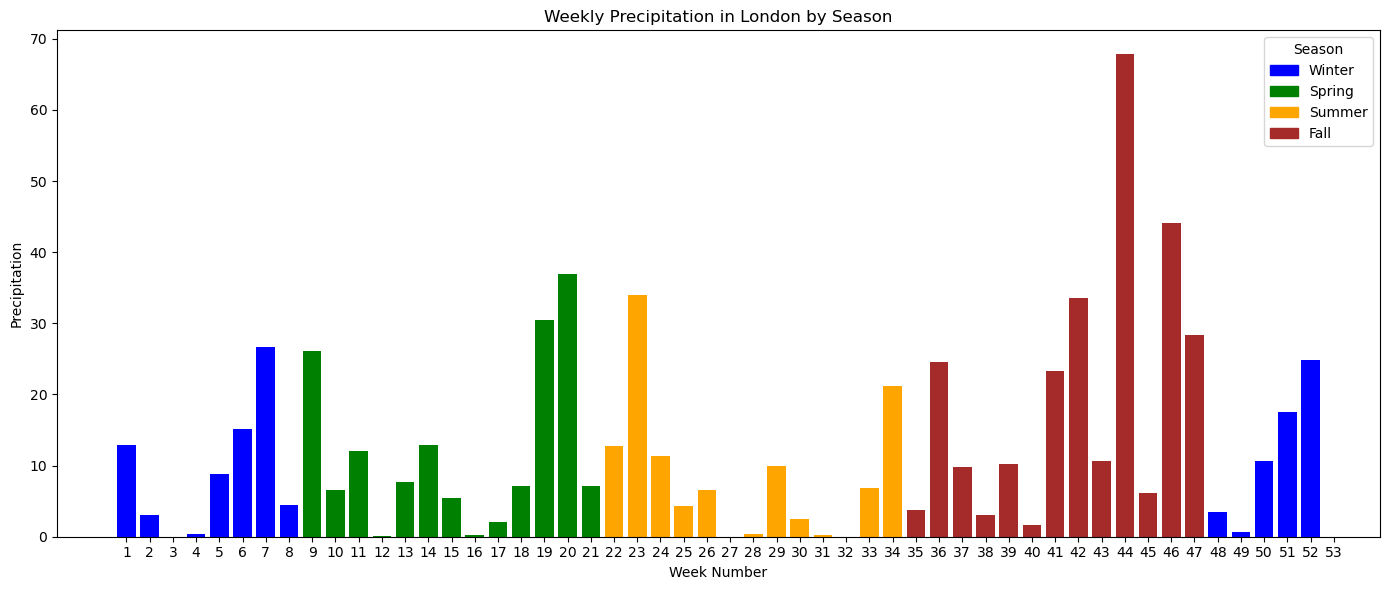

In [35]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_weekly_lon['season'] = df_weekly_lon.index.map(get_season)
df_weekly_lon['week_number'] = df_weekly_lon.index.isocalendar().week

season_colors = {
    'Winter': 'blue',
    'Spring': 'green',
    'Summer': 'orange',
    'Fall': 'brown'
}
bar_colors = df_weekly_lon['season'].map(season_colors)

plt.figure(figsize=(14, 6))
plt.bar(df_weekly_lon['week_number'], df_weekly_lon['precipitation'], color=bar_colors)

legend_patches = [Patch(color=color, label=season) for season, color in season_colors.items()]
plt.legend(handles=legend_patches, title='Season')

plt.title('Weekly Precipitation in London by Season')
plt.xlabel('Week Number')
plt.ylabel('Precipitation')
plt.xticks(range(1, 54))  # ISO weeks go up to 53
plt.tight_layout()
plt.show()


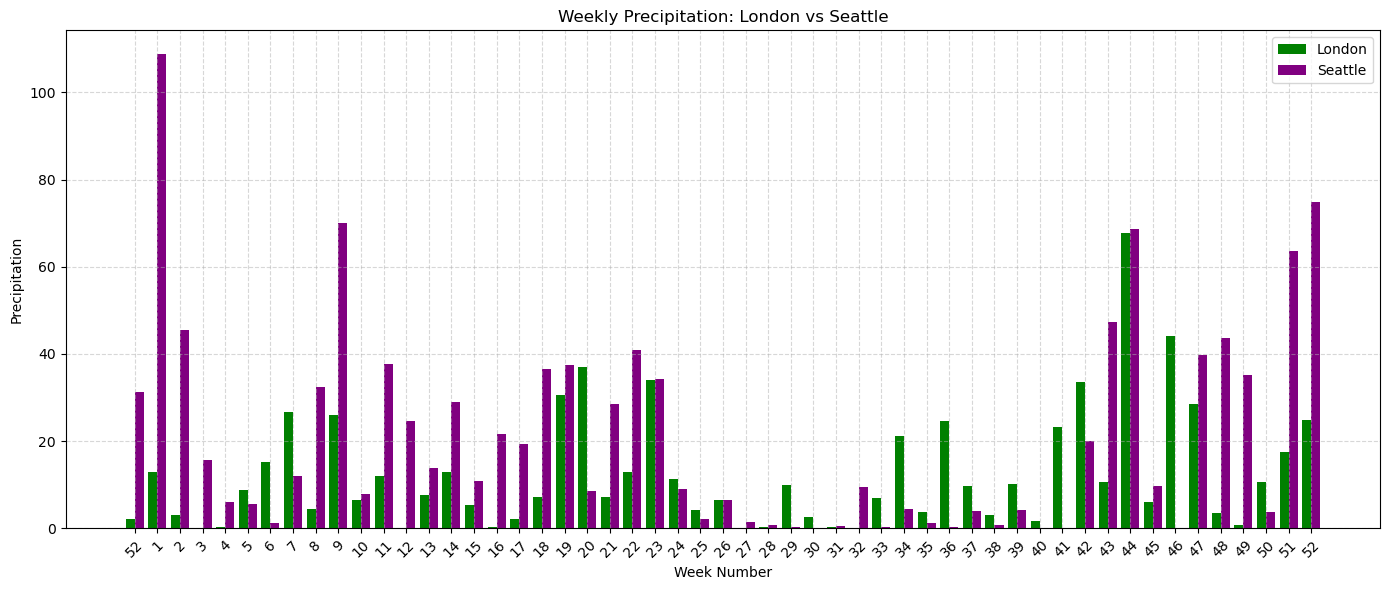

In [36]:
# compare charts; use numpy

weeks = df_weekly_lon['week_number']
bar_width = 0.4
x = np.arange(len(weeks))

plt.figure(figsize=(14, 6))
plt.bar(x - bar_width/2, df_weekly_lon['precipitation'], width=bar_width, color='green', label='London')
plt.bar(x + bar_width/2, df_weekly_sea['precipitation'], width=bar_width, color='purple', label='Seattle')
plt.title('Weekly Precipitation: London vs Seattle')
plt.xlabel('Week Number')
plt.ylabel('Precipitation')
plt.xticks(x, weeks, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


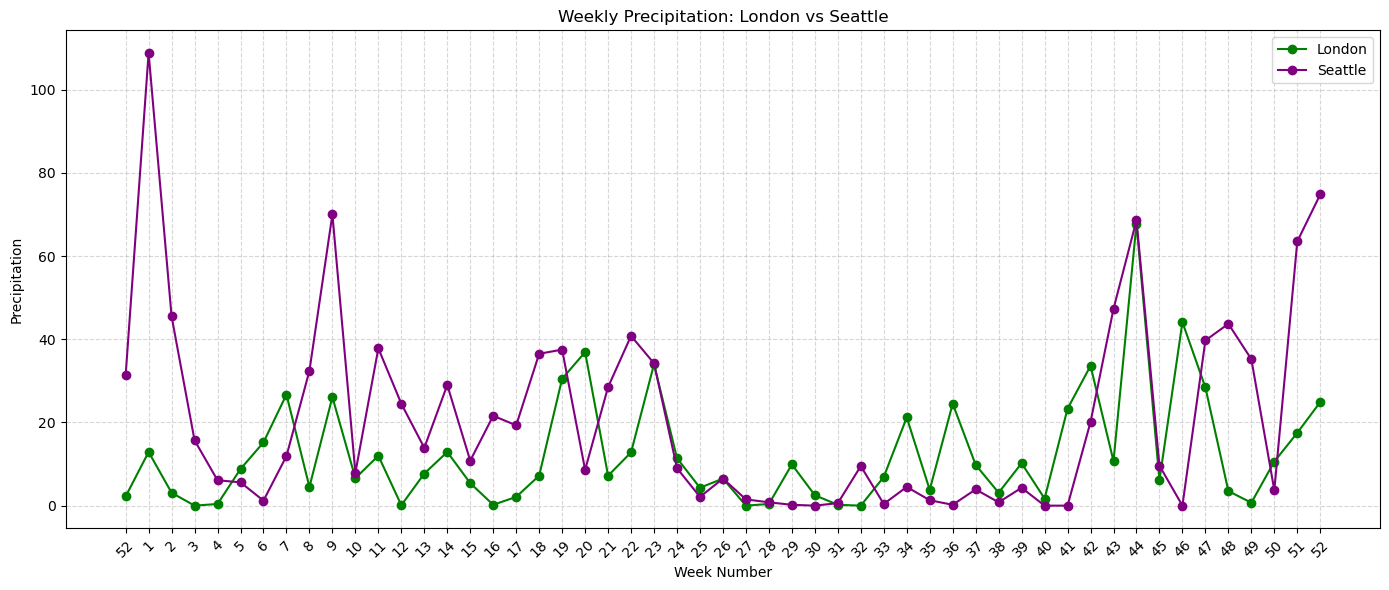

In [37]:
weeks = df_weekly_lon['week_number']
x = np.arange(len(weeks))
plt.figure(figsize=(14, 6))
plt.plot(x, df_weekly_lon['precipitation'], color='green', label='London', marker='o')
plt.plot(x, df_weekly_sea['precipitation'], color='purple', label='Seattle', marker='o')
plt.title('Weekly Precipitation: London vs Seattle')
plt.xlabel('Week Number')
plt.ylabel('Precipitation')
plt.xticks(x, weeks, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Analysis:

Overall, Seattle had more rainfall than did London in CY2022. Seattle's rainfall was lowest during the summer weeks with its peak precipitation levels occuring in winter.  London's rainfall was mostly consistent across the seasons with its highest peask in late fall.

